In [16]:
### 필요 라이브러리
import numpy as np
import mnist
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.models import Sequential #모델순차적으로 쌓는 lib
from tensorflow.keras.utils import to_categorical

### 데이터 불러오기

In [12]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [14]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [15]:
## 28이 픽셀이 모여서 완성됨

In [17]:
eachImg = pd.DataFrame( train_images[2] )

In [18]:
type(eachImg)

pandas.core.frame.DataFrame

In [20]:
eachImg.to_csv("F:/eachImg.csv")

In [ ]:
###영상 : 30Frame(이미지)/second

In [22]:
# 이미지 정규화
train_images = (train_images / 255)
test_images = (test_images / 255)

In [34]:
# 데이터를 그시점에 있는 데이터가 위치할 수 있도록 한다

In [32]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [33]:
train_labels_one_hot[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
np.argmax(train_labels_one_hot[2])

4

### B-1. 모델 생성

In [42]:
# input layer를 위한 설정
input_shape = train_images[0].shape
input_shape

(28, 28)

In [43]:
# output layer를 위한 설정
nClasses = 10
nClasses = len( np.unique(train_labels) )

In [51]:
model = Sequential()
# input layer
model.add(Flatten(input_shape=input_shape))
# hidden layer
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=16, activation="relu"))
# output layer
model.add(Dense(units=nClasses, activation="softmax"))

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


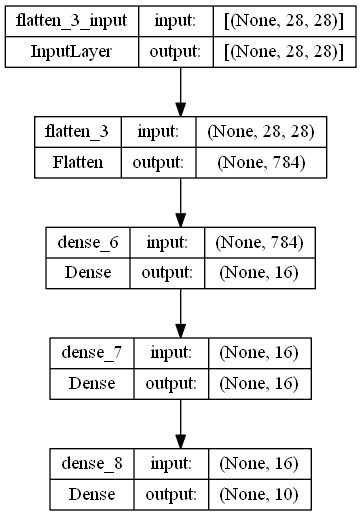

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)

### B-2. 모델 컴파일

In [55]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"] )

### B-3. 모델 훈련

In [57]:
train_images.shape

(60000, 28, 28)

In [58]:
48000/32

1500.0

In [56]:
history = model.fit(x=train_images,
                    y=train_labels_one_hot,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5509 - accuracy: 0.5203 - val_loss: 0.9019 - val_accuracy: 0.7285
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7782 - accuracy: 0.7550 - val_loss: 0.6575 - val_accuracy: 0.8027
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6257 - accuracy: 0.8056 - val_loss: 0.5530 - val_accuracy: 0.8374
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5447 - accuracy: 0.8368 - val_loss: 0.4900 - val_accuracy: 0.8624
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4884 - accuracy: 0.8589 - val_loss: 0.4406 - val_accuracy: 0.8754
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4511 - accuracy: 0.8696 - val_loss: 0.4226 - val_accuracy: 0.8823
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4283 - accuracy: 0.8760 - val_loss: 0.3958 - val_accuracy:

### C-1. 모델 추론

In [67]:
import cv2 #이미지 사이즈 조절

In [75]:
testImg3 = cv2.imread("./KakaoTalk_20230612_155700524.jpg",cv2.IMREAD_GRAYSCALE)

In [76]:
import matplotlib.pyplot as plt

In [77]:
model

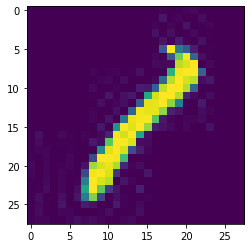

In [78]:
plt.imshow(testImg3)

In [80]:
testImg = testImg3.astype(float)
testImg = testImg3 / 255.0
testImg = testImg3.reshape(1,28,28)
answer = model.predict(testImg)

1/1 [==============================] - 0s 99ms/step


In [81]:
np.argmax(answer)

8

In [ ]:
model.evaluate(test_images, test_labels

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_7096/3403999592.py, line 1)

In [23]:
type(train_images)

numpy.ndarray

In [ ]:
## 리스트 & array 차이

In [26]:
[1,2,3,4] / 2  ##오류

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [27]:
np.array([1,2,3,4]) /2

array([0.5, 1. , 1.5, 2. ])

In [31]:
train_labels[9]

4